Hi

In this course i try to cover the most important parts of Time Series and finance approachs in python. Since now a days with a bunch of data every where, so it is possible to analyze data to make effective decisions.
I use Amazon,Apple and Microsoft stck prices which are huge companies, So you can use this methods on your own Time series dataset. 
    

Here at first we need to import some libraries

In [28]:
import numpy as np
import pandas as pd
import datetime as dt
from pylab import mpl, plt

I use seaborn style in this toturial because it is more beautiful. Later i will use plotly which is very fancy. 

In [29]:
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

Now, we read the dataset ,we have 2 parameters here first,<font color=green>index_col=0</font>  here i select my first column as index of dataset, and<font color=green> parse_data= True</font> we makes it clear to pandas that we have time in data so dandas parse it as date types to work easier on it.

In [71]:
df = pd.read_csv('tr_eikon_eod_data.csv', index_col = 0, parse_dates =True)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2216 entries, 2010-01-01 to 2018-06-29
Data columns (total 12 columns):
AAPL.O    2138 non-null float64
MSFT.O    2138 non-null float64
INTC.O    2138 non-null float64
AMZN.O    2138 non-null float64
GS.N      2138 non-null float64
SPY       2138 non-null float64
.SPX      2138 non-null float64
.VIX      2138 non-null float64
EUR=      2216 non-null float64
XAU=      2211 non-null float64
GDX       2138 non-null float64
GLD       2138 non-null float64
dtypes: float64(12)
memory usage: 225.1 KB


describe() is an important statistical method that is very suitable we can get percentile, mean, std, max and many important infromation very fast.

In [73]:
df.describe()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
count,2138.000000,2138.000000,2138.000000,2138.000000,2138.000000,2138.000000,2138.000000,2138.000000,2216.000000,2211.000000,2138.000000,2138.00000
mean,93.455973,44.561115,29.364192,480.461251,170.216221,180.323029,1802.713106,17.027133,1.248587,1349.014130,33.566525,130.08659
std,40.551559,19.527712,8.172160,372.307818,42.483935,48.190071,483.337146,5.883428,0.113711,188.745856,15.169564,18.78359
min,27.435687,23.010000,17.665000,108.610000,87.700000,102.200000,1022.580000,9.140000,1.038500,1051.360000,12.470000,100.50000
25%,60.294225,28.566875,22.510000,213.595000,146.607500,133.987500,1338.567500,13.072500,1.131500,1221.525000,22.142500,117.40250
50%,90.550624,39.660000,27.330000,322.065000,164.430000,186.320000,1863.080000,15.585000,1.270250,1292.610000,25.625000,124.00500
75%,117.235000,54.372500,34.710000,698.850000,192.132500,210.987500,2108.942500,19.067500,1.345400,1428.240000,48.342500,139.00250
max,193.980000,102.490000,57.080000,1750.080000,273.380000,286.580000,2872.870000,48.000000,1.482600,1898.990000,66.630000,184.59000


As I need to work on Amazon dataset, I select 'AMZN.O' and reform it to a datafram.

In [74]:
column = 'AMZN.O'
data = pd.DataFrame(df[column]).dropna()

In [75]:
data.head()

,AMZN.O
Date,
2010-01-04,133.90
2010-01-05,134.69
2010-01-06,132.25
2010-01-07,130.00
2010-01-08,133.52


## Changes over Time

Sometimes working on changes is more helpful than working on values.
There is 3 approachs to calculate changes:

  * Absolute difference.
  * Percentage difference.
  * Logarithmic (log) returns.
  
I'm going to cover all 3 methods with proc and cons.

### Absolute difference:


In [78]:
diff = data.diff().head()
diff.dropna()

,AMZN.O
Date,
2010-01-05,0.79
2010-01-06,-2.44
2010-01-07,-2.25
2010-01-08,3.52


diff() illustrates changes between two indexes values. It is not very optimal since they are dependent one scale of data.
So, next method (percentage) solve this problem.
### Percentage Changes:

In [80]:
pct_changes = df.pct_change().head()
pct_changes.dropna()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-05,0.001729,0.000323,-0.000479,0.005900,0.017680,0.002647,0.003116,-0.034431,-0.002984,-0.001205,0.009642,-0.000911
2010-01-06,-0.015906,-0.006137,-0.003354,-0.018116,-0.010673,0.000704,0.000546,-0.009819,0.003062,0.017745,0.024289,0.016500
2010-01-07,-0.001849,-0.010335,-0.009615,-0.017013,0.019568,0.004221,0.004001,-0.005219,-0.006522,-0.005797,-0.004864,-0.006188


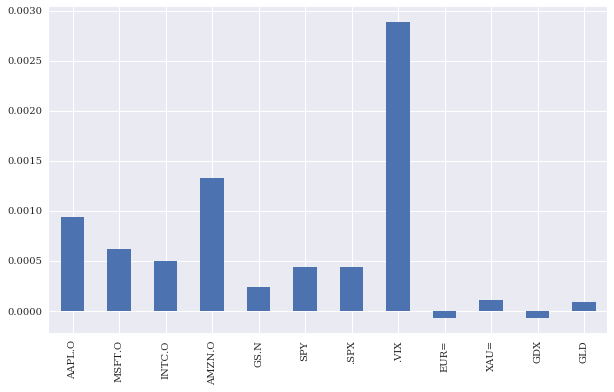

In [81]:
df.pct_change().mean().plot(kind = 'bar', figsize = (10,6))

### Log Return

As an alternative to percentage_change, log returns can be used. in some cases they are easier to handle and often prefered in financial approachs.

In [83]:
log_ret = np.log(df / df.shift(1))
log_ret.head().dropna()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-05,0.001727,0.000323,-0.000479,0.005883,0.017525,0.002644,0.003111,-0.035038,-0.002988,-0.001206,0.009595,-0.000911
2010-01-06,-0.016034,-0.006156,-0.003360,-0.018282,-0.010731,0.000704,0.000545,-0.009868,0.003058,0.017589,0.023999,0.016365
2010-01-07,-0.001850,-0.010389,-0.009662,-0.017160,0.019379,0.004212,0.003993,-0.005233,-0.006544,-0.005814,-0.004876,-0.006207


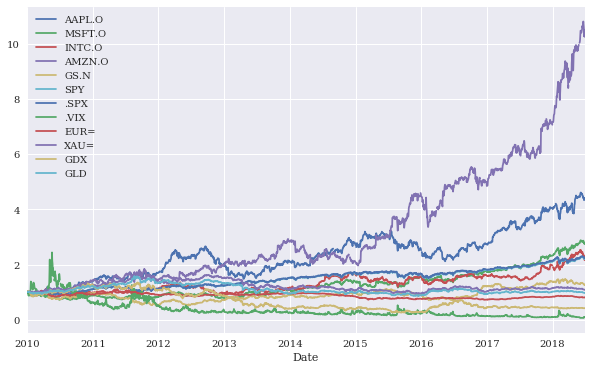

In [84]:
log_ret.cumsum().apply(np.exp).plot(figsize =(10,6))

### Resampling

In financial time series, resampling is one of the most popular methods, we can resample data to one_minutes or 1 week
or months or yearly observations.

In [109]:
def resample(distance, label = 'right'):
    
    resample = df.resample(distance, label = label).last().dropna()
    return resample

In [110]:
df_1week = resample('1w') #1m, 1y, 
df_1week.head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-10,30.282827,30.66,20.83,133.52,174.31,114.57,1144.98,18.13,1.4412,1136.10,49.84,111.37
2010-01-17,29.418542,30.86,20.80,127.14,165.21,113.64,1136.03,17.91,1.4382,1129.90,47.42,110.86
2010-01-24,28.249972,28.96,19.91,121.43,154.12,109.21,1091.76,27.31,1.4137,1092.60,43.79,107.17
2010-01-31,27.437544,28.18,19.40,125.41,148.72,107.39,1073.87,24.62,1.3862,1081.05,40.72,105.96
2010-02-07,27.922829,28.02,19.47,117.39,154.16,106.66,1066.19,26.11,1.3662,1064.95,42.41,104.68


### Moving Averages 

The average price of a security over a certain time period, calculated continuously. For instance, one may calculate a moving average by adding prices from the most recent trading days (for example, the last 10 days) and dividing by the number of trading days considered (in this case, 10). A moving average may or may not be weighted. Moving averages help smooth out noise that may be present in a security's price on a given trading day. See also: Simple Moving Average, Exponential Moving Average.

In [35]:
SMA_50 = 50
SMA_250 = 250

data['SMA_250'] = data[column].rolling(SMA_250).mean()
data['SMA_50'] = data[column].rolling(SMA_50).mean()


'SMA_50' and 'SMA_250' are 2 windows that means we calculate values for day 0 to 50 and the mean of that 50 values set as day 0, again 1 to 51 and the mean set for day 1 and it continues to the end.
SMA_250 is the same just the window size is different (is 250)

In [36]:
data[['SMA_250','SMA_50']].dropna().head()

,SMA_250,SMA_50
Date,,
2010-12-29,138.803731,172.0186
2010-12-30,138.999131,172.5002
2010-12-31,139.180371,172.9268
2011-01-03,139.388251,173.3118
2011-01-04,139.608291,173.6294


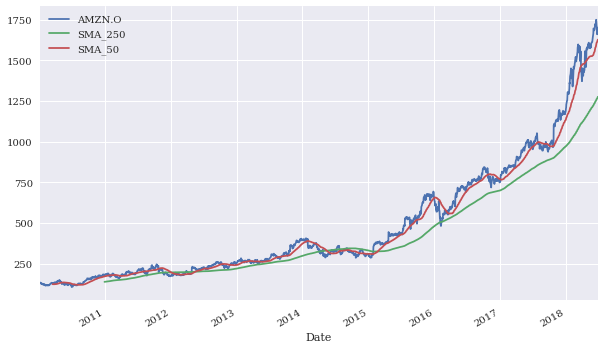

In [37]:
data.plot(figsize=(10,6))

SO what can we underestand from abow plot or rolling method?
Well, one strategy is this one when SMA_50 is larger than SMA_250 you should hold the stocks and as you se red one is for 50 and green one is for 250 .

In [38]:
data.dropna(inplace = True)

Now, I create a new column called 'position' which contains 1 for the places that SMA_50 > SMA_250 (places that we hold the stocks) and -1 for other places.

In [39]:
data['Position'] = np.where(data['SMA_50'] > data['SMA_250'],1,-1)
data.tail()

,AMZN.O,SMA_250,SMA_50,Position
Date,,,,
2018-06-25,1663.15,1264.96110,1613.2545,1
2018-06-26,1691.09,1267.76414,1618.2463,1
2018-06-27,1660.51,1270.50246,1621.3799,1
2018-06-28,1701.45,1273.43626,1624.8521,1
2018-06-29,1699.80,1276.42082,1627.7099,1


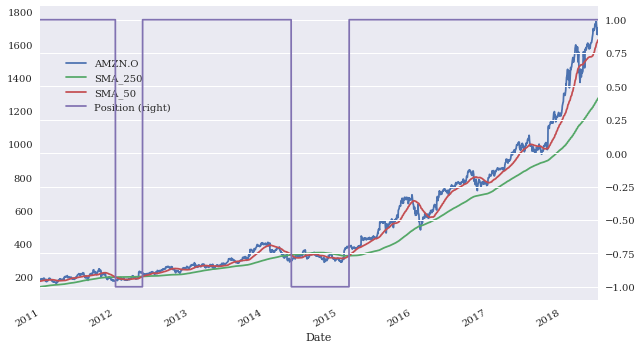

In [40]:
ax = data.plot(secondary_y='Position', figsize=(10,6))
ax.get_legend().set_bbox_to_anchor((0.25,0.85 ))

### Vectorized Backtesting

first we calculate the log return, then posotionings as 1 and -1, are multiplied by the relevent log_return.


In [112]:
data['Return'] = np.log(data[column] / data[column].shift(1))

data['Strategy'] = data['Position'].shift(1) * data['Return']

data.round(4).head()

KeyError: 'Position'

In [113]:
data.dropna(inplace = True)

In [43]:
np.exp(data[['Return','Strategy']].sum())

Return      9.269782
Strategy    3.597542
dtype: float64

In [111]:
ax = data[['Return','Strategy']].cumsum().apply(np.exp).plot(figsize =(10,6))
data['Position'].plot(ax =ax, secondary_y = 'Position', style ='--')
ax.get_legend().set_bbox_to_anchor((0.25,0.85))

KeyError: "None of [Index(['Return', 'Strategy'], dtype='object')] are in the [columns]"